# Train Your first PyTorch Model [Card Classifier]

In this tutorial I'm following the instructions from the following **YouTube** video.

[Build Your First Pytorch Model In Minutes!](https://www.youtube.com/watch?v=tHL5STNJKag)

[Kaggle Notebook](https://www.kaggle.com/code/robikscube/train-your-first-pytorch-model-card-classifier)

[Cards Image Dataset-Classification](https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification/)

In this notebook we will create an image classifier to detect playing cards.
We break this down into 3 steps:
1. PyTorch Dataset (PlayingCardDataset)
2. PyTorch Model (SimpleCardClassifier)
3. PyTorch Training

**Note**: These steps are critical to training most PyTorch models.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

import matplotlib.pyplot as plt # For data viz
import pandas as pd
import numpy as np
import sys
from tqdm.notebook import tqdm

print('System Version:', sys.version)
print('PyTorch version', torch.__version__)
print('Torchvision version', torchvision.__version__)
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)


System Version: 3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]
PyTorch version 2.1.1
Torchvision version 0.16.1
Numpy version 1.24.3
Pandas version 2.0.3


# Step 1. PyTorch Dataset (and DataLoader)

## Dataset

In [2]:
class PlayingCardDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

    @property
    def classes(self):
        return self.data.classes

In [3]:
dataset = PlayingCardDataset(data_dir='./data/train')

In [4]:
# Length of our dataset
len(dataset)

7624

label: 34
label name: seven of diamonds


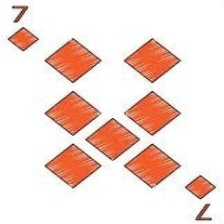

In [5]:
image, label = dataset[5000]
print('label:',label)
print('label name:', dataset.classes[label])
image

In [6]:
# Show a map of label indices to label names
label_names = {label: name for label, name in enumerate(dataset.classes)}
print(label_names)


{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [7]:
# Lets keep all images the same size
# We will use the transforms.Resize() function to do this. This then converts the image to a PyTorch tensor.
transforms = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

# Now lets recreate our dataset with the new transforms
dataset = PlayingCardDataset(data_dir='./data/train', transform=transforms)

In [13]:
image, label = dataset[100]
print('label:',label)
print('label name:', dataset.classes[label])

# NOTE: The image is now a PyTorch tensor
image

label: 0
label name: ace of clubs


tensor([[[0.0000, 0.0039, 0.0078,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0078, 0.0431,  ..., 0.0196, 0.0039, 0.0078],
         [0.0157, 0.0392, 0.3490,  ..., 0.2392, 0.0314, 0.0118],
         ...,
         [0.0039, 0.0235, 0.2392,  ..., 0.2196, 0.0314, 0.0118],
         [0.0039, 0.0039, 0.0235,  ..., 0.0118, 0.0078, 0.0039],
         [0.0039, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0039]],

        [[0.0078, 0.0078, 0.0039,  ..., 0.0039, 0.0039, 0.0039],
         [0.0039, 0.0039, 0.0392,  ..., 0.0196, 0.0039, 0.0078],
         [0.0118, 0.0275, 0.3373,  ..., 0.2392, 0.0275, 0.0078],
         ...,
         [0.0039, 0.0235, 0.2431,  ..., 0.2196, 0.0314, 0.0078],
         [0.0039, 0.0039, 0.0235,  ..., 0.0157, 0.0078, 0.0039],
         [0.0039, 0.0078, 0.0039,  ..., 0.0039, 0.0078, 0.0039]],

        [[0.0196, 0.0196, 0.0118,  ..., 0.0157, 0.0118, 0.0118],
         [0.0118, 0.0078, 0.0353,  ..., 0.0157, 0.0039, 0.0078],
         [0.0078, 0.0196, 0.3137,  ..., 0.2196, 0.0235, 0.

In [14]:
image.shape

torch.Size([3, 128, 128])

In [15]:
# iterate over dataset
for image, label in dataset:
    break

## Dataloaders

* Batching our dataset
* It's faster to train the model in batches instead of one at a time.

In [17]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [18]:
for images, labels in dataloader:
    break


In [22]:
# Note that the images are now in a batch into 32 examples.
images.shape, labels.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))